In [2]:
import numpy as np
import pandas as pd

In [3]:
#veri seti oluşutalım
data=pd.DataFrame(np.random.randn(6,6),  #randn eksi sayılarıda verir
                 index=['mete','ferhat','batu','ebru','buğra','rabiye'],
                 columns=['Şeker','Potasyum','Sodyum','ALT','AST','CRP'])
data

,Şeker,Potasyum,Sodyum,ALT,AST,CRP
mete,-0.428011,-1.921501,-0.925488,0.679303,0.759571,-0.031193
ferhat,0.228294,-1.356189,-1.355261,0.118179,0.506914,-0.777689
batu,-0.613881,-1.246659,0.593029,0.500005,0.705748,0.300883
ebru,1.981153,-2.591190,-0.578866,-0.823167,0.825413,-0.682325
buğra,1.940811,0.228979,1.209795,-1.229229,-2.126655,-0.411994
rabiye,-0.050842,-0.337387,0.009515,-1.439708,-2.145526,0.941734


In [5]:
data.loc['ferhat','ALT']=np.nan

In [6]:
data.loc['ferhat','ALT']=np.nan
data.loc['ferhat','CRP']=np.nan
data.loc['mete','CRP']=np.nan
data.loc['buğra','ALT']=np.nan
data

,Şeker,Potasyum,Sodyum,ALT,AST,CRP
mete,-0.428011,-1.921501,-0.925488,0.679303,0.759571,NaN
ferhat,0.228294,-1.356189,-1.355261,NaN,0.506914,NaN
batu,-0.613881,-1.246659,0.593029,0.500005,0.705748,0.300883
ebru,1.981153,-2.591190,-0.578866,-0.823167,0.825413,-0.682325
buğra,1.940811,0.228979,1.209795,NaN,-2.126655,-0.411994
rabiye,-0.050842,-0.337387,0.009515,-1.439708,-2.145526,0.941734


In [70]:
data.dropna()  #hem satır hem sütünden siler nan değerleri

,Şeker,Potasyum,Sodyum,ALT,AST,CRP
batu,0.038662,1.363963,0.393042,-0.753707,0.242909,-0.158666
ebru,-0.417795,0.357380,-0.768084,-0.089896,0.699240,0.037576
rabiye,-0.078901,-0.959822,-1.208496,0.137550,-0.106806,-1.689004


In [71]:
data.dropna(axis=1) #nan değerleri olan sütün gitti

,Şeker,Potasyum,Sodyum,AST
mete,-0.607251,-0.168200,1.125226,-1.111462
ferhat,-0.263534,1.321955,0.756624,1.815808
batu,0.038662,1.363963,0.393042,0.242909
ebru,-0.417795,0.357380,-0.768084,0.699240
buğra,0.556614,-0.039443,-0.062570,0.991548
rabiye,-0.078901,-0.959822,-1.208496,-0.106806


In [72]:
data.sum().sum() # bütün verilerin toplamı 

-1.1517470659219402

In [73]:
data.isnull()  #nan olan değerleri gösterir

,Şeker,Potasyum,Sodyum,ALT,AST,CRP
mete,False,False,False,False,False,True
ferhat,False,False,False,True,False,True
batu,False,False,False,False,False,False
ebru,False,False,False,False,False,False
buğra,False,False,False,True,False,False
rabiye,False,False,False,False,False,False


In [7]:
#veri setindeki nan olan değerleri verilerin ortalaması ile dolduralım ve kendi methodumuzu yazalım 
def OrtalamaIleDoldur(data): # methodumuzun adı aldığı parametre
    toplam=data.sum().sum()
    elemanSayisi=data.size-data.isnull().sum().sum()  # tüm veri sayısı - nan olan sayı
    ortalama=toplam/elemanSayisi
    return ortalama



In [8]:
ortalama=OrtalamaIleDoldur(data)
ortalama

-0.23823444933289495

In [76]:
data.fillna(value=ortalama)  #nan değerleri fillna methodu ile ortalama bularak doldurduk

,Şeker,Potasyum,Sodyum,ALT,AST,CRP
mete,-0.607251,-0.168200,1.125226,-1.391849,-1.111462,-0.035992
ferhat,-0.263534,1.321955,0.756624,-0.035992,1.815808,-0.035992
batu,0.038662,1.363963,0.393042,-0.753707,0.242909,-0.158666
ebru,-0.417795,0.357380,-0.768084,-0.089896,0.699240,0.037576
buğra,0.556614,-0.039443,-0.062570,-0.035992,0.991548,-1.114357
rabiye,-0.078901,-0.959822,-1.208496,0.137550,-0.106806,-1.689004


In [77]:
data.mean().mean() #ortalama bulur kendi methodumuzu yazmasaydık bununla bulurduk

-0.10174787645241778

In [78]:
data1=data.fillna(np.nanmean(data))
data1

,Şeker,Potasyum,Sodyum,ALT,AST,CRP
mete,-0.607251,-0.168200,1.125226,-1.391849,-1.111462,-0.035992
ferhat,-0.263534,1.321955,0.756624,-0.035992,1.815808,-0.035992
batu,0.038662,1.363963,0.393042,-0.753707,0.242909,-0.158666
ebru,-0.417795,0.357380,-0.768084,-0.089896,0.699240,0.037576
buğra,0.556614,-0.039443,-0.062570,-0.035992,0.991548,-1.114357
rabiye,-0.078901,-0.959822,-1.208496,0.137550,-0.106806,-1.689004


In [79]:
data=pd.read_csv("iris.csv")  #csv dosyası ile çalışma dosyan aynı yerde olmalı 
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [80]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [81]:
data.head(20)  #ilk 20 data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [82]:
data.tail(5)  #sondan 5 veriyi getir

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [83]:
data.shape  #150 satır 6.sütün

(150, 6)

In [84]:
data.columns #veri setinde bulunan sütün adlarını verir.

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [85]:
data.info()  #!!!!!  veri seti hakkında özet bilgi verir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [86]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [87]:
data.isnull().sum()  #eksik veri var mı yok mu diye bakarız 

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [88]:
data.Species.value_counts()  # veri seti kaç sınıftan oluşur ve kaç adet olduğunu söyler

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [90]:
setosa=data[data.Species=='Iris-setosa']
versicolor=data[data.Species=='Iris-versicolor']
virginica=data[data.Species=='Iris-virginica']

In [22]:
virginica

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
100,101,6.3,3.3,6.0,2.5,Iris-virginica
101,102,5.8,2.7,5.1,1.9,Iris-virginica
102,103,7.1,3.0,5.9,2.1,Iris-virginica
103,104,6.3,2.9,5.6,1.8,Iris-virginica
104,105,6.5,3.0,5.8,2.2,Iris-virginica
105,106,7.6,3.0,6.6,2.1,Iris-virginica
106,107,4.9,2.5,4.5,1.7,Iris-virginica
107,108,7.3,2.9,6.3,1.8,Iris-virginica
108,109,6.7,2.5,5.8,1.8,Iris-virginica
109,110,7.2,3.6,6.1,2.5,Iris-virginica


In [91]:
setosa

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [96]:
yeniData=data.drop(['Id'],axis=1)
yeniData.head() 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [97]:
import matplotlib.pyplot as plt #verileri görselleştirmek için kullanılan kütüphane


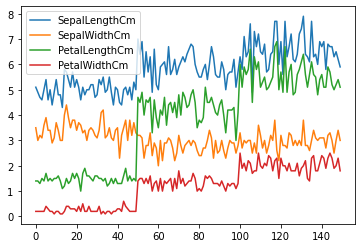

In [98]:
yeniData.plot() #plot yapısı ile görselleştir
plt.show() #sadece görseller gelsin gereksiz yazılar gelmesin diye yazılır 

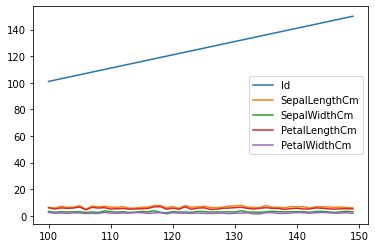

In [26]:
virginica.plot()
plt.show()

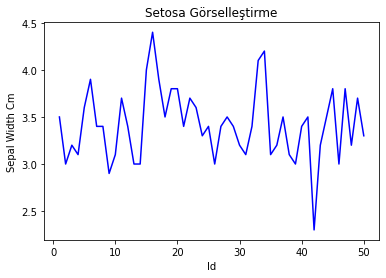

In [99]:
plt.plot(setosa.Id,setosa.SepalWidthCm,color='blue')
plt.xlabel('Id') #x eksinene yazılacak yazı
plt.ylabel('Sepal Width Cm') #y eksinene yazılacak yazı
plt.title('Setosa Görselleştirme')
plt.show()

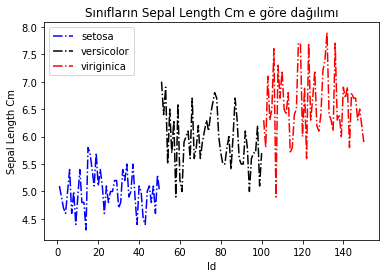

In [100]:
plt.plot(setosa.Id,setosa.SepalLengthCm,color='blue',label="setosa",linestyle="-.")
plt.plot(versicolor.Id,versicolor.SepalLengthCm,color='black',label="versicolor",linestyle="-.")
plt.plot(virginica.Id,virginica.SepalLengthCm,color='red',label="viriginica",linestyle="-.")
plt.legend() #labelleri yazıları görselde göstermek için kullanılır
plt.xlabel('Id')
plt.ylabel('Sepal Length Cm')
plt.title('Sınıfların Sepal Length Cm e göre dağılımı')
plt.show()

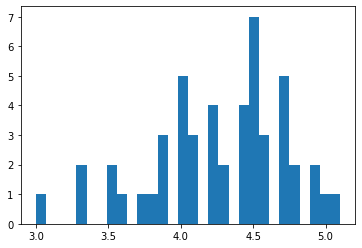

In [29]:
plt.hist(versicolor.PetalLengthCm,bins=30) #histogramını çizdirir
plt.show()


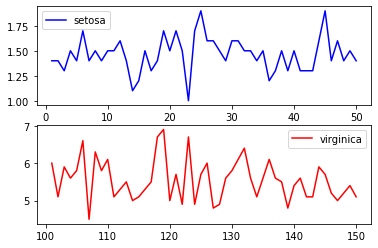

In [30]:
    plt.subplot(2,1,1)
    plt.plot(setosa.Id,setosa.PetalLengthCm,color='b',label='setosa')
    plt.legend()
    
    plt.subplot(2,1,2)
    plt.plot(virginica.Id,virginica.PetalLengthCm,color='r',label='virginica')
    plt.legend()
    
    plt.show()